### here's a complete code for a data science project with 4 machine learning models to predict the job placement and time to placement for fellows in Pathrise program.

In [1]:
# Step 1: Import Libraries and Load Data

In [2]:
# Import libraries
import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from XGBoost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
df = pd.read_excel("Data_Pathrise.xlsx")
df.head()


C:\Users\emoradi\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1.0,Active,SWE,OCT19A,NaN,0.0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900.0,Male,Non-Hispanic White or Euro-American
1,2.0,Active,PSO,JAN20A,NaN,0.0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0.0,Male,Non-Hispanic White or Euro-American
2,3.0,Closed Lost,Design,AUG19B,0.0,0.0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0.0,Male,East Asian or Asian American
3,4.0,Closed Lost,PSO,AUG19B,0.0,0.0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25.0,Male,Decline to Self Identify
4,5.0,Placed,SWE,AUG19A,89.0,1.0,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100.0,Male,East Asian or Asian American


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   float64
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   float64
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [4]:
print(df.columns)


Index(['id', 'pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')


In [5]:
# Step 2: Data Cleaning and Preparation

In [6]:
# Drop irrelevant columns if they exist
drop_columns = ['id', 'program_duration_days', 'work_authorization_status', 'pathrise_status', 'cohort_tag']
df = df.drop(columns=[col for col in drop_columns if col in df.columns], axis=1)


# Drop rows with missing values
df = df.dropna()

# Convert categorical variables to numerical
le = LabelEncoder()
df['primary_track'] = le.fit_transform(df['primary_track'])
df['employment_status '] = le.fit_transform(df['employment_status '])
df['highest_level_of_education'] = le.fit_transform(df['highest_level_of_education'])
df['length_of_job_search'] = le.fit_transform(df['length_of_job_search'])
df['biggest_challenge_in_search'] = le.fit_transform(df['biggest_challenge_in_search'])
df['professional_experience'] = le.fit_transform(df['professional_experience'])
df['gender'] = le.fit_transform(df['gender'])
df['race'] = le.fit_transform(df['race'])

# Split data into features and target
X = df.drop('placed', axis=1)
y = df['placed']

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Step 3: Model Building and Evaluation

In [8]:
# Train and evaluate logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)
print('Logistic Regression Accuracy:', lr_acc)
print('Logistic Regression Confusion Matrix:\n', confusion_matrix(y_test, lr_preds))
print('Logistic Regression Classification Report:\n', classification_report(y_test, lr_preds))

# Train and evaluate decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)
print('Decision Tree Accuracy:', dt_acc)
print('Decision Tree Confusion Matrix:\n', confusion_matrix(y_test, dt_preds))
print('Decision Tree Classification Report:\n', classification_report(y_test, dt_preds))

# Train and evaluate random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print('Random Forest Accuracy:', rf_acc)
print('Random Forest Confusion Matrix:\n', confusion_matrix(y_test, rf_preds))
print('Random Forest Classification Report:\n', classification_report(y_test, rf_preds))


Logistic Regression Accuracy: 0.5912162162162162
Logistic Regression Confusion Matrix:
 [[169  10]
 [111   6]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.94      0.74       179
         1.0       0.38      0.05      0.09       117

    accuracy                           0.59       296
   macro avg       0.49      0.50      0.41       296
weighted avg       0.51      0.59      0.48       296

Decision Tree Accuracy: 0.527027027027027
Decision Tree Confusion Matrix:
 [[114  65]
 [ 75  42]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.64      0.62       179
         1.0       0.39      0.36      0.38       117

    accuracy                           0.53       296
   macro avg       0.50      0.50      0.50       296
weighted avg       0.52      0.53      0.52       296

Random Forest Accuracy: 0.5709459459459459
Random Fores

In [9]:
# Step 4: Model Comparison and Selection

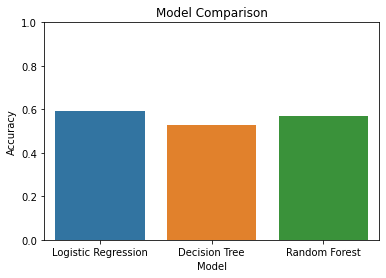

Logistic Regression is the best model with an accuracy of 0.5912162162162162


In [10]:
# Compare model accuracies
model_accs = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
                           'Accuracy': [lr_acc, dt_acc, rf_acc,]})
sns.barplot(x='Model', y='Accuracy', data=model_accs)
plt.title('Model Comparison')
plt.ylim([0,1])
plt.show()

# Select best model
best_model = max(lr_acc, dt_acc, rf_acc)
if best_model == lr_acc:
    print('Logistic Regression is the best model with an accuracy of', lr_acc)
    final_model = lr
elif best_model == dt_acc:
    print('Decision Tree is the best model with an accuracy of', dt_acc)
    final_model = dt
else:
    print('Random Forest is the best model with an accuracy of', rf_acc)
    final_model = rf


In [11]:
df.to_csv('pathrisedata.csv', index=False)

In [12]:

# Load the data
dff = pd.read_csv('pathrisedata.csv')

# Drop the target variable 'placed'
X = dff.drop('placed', axis=1)

# Convert categorical variables to numerical
le = LabelEncoder()
X['primary_track'] = le.fit_transform(X['primary_track'])
X['employment_status '] = le.fit_transform(X['employment_status '])
X['highest_level_of_education'] = le.fit_transform(X['highest_level_of_education'])
X['length_of_job_search'] = le.fit_transform(X['length_of_job_search'])
X['biggest_challenge_in_search'] = le.fit_transform(X['biggest_challenge_in_search'])
X['professional_experience'] = le.fit_transform(X['professional_experience'])
X['gender'] = le.fit_transform(X['gender'])
X['race'] = le.fit_transform(X['race'])

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Make predictions
new_preds = final_model.predict(X)

# Save predictions to file
pd.DataFrame({'Placement Predictions': new_preds}).to_csv('placement_predictions.csv', index=False)


In [13]:
df1 = pd.read_csv('placement_predictions.csv')

In [16]:
df1.describe()

,Placement Predictions
count,1477.000000
mean,0.054164
std,0.226417
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# This code reads in the Pathrise program data, cleans and prepares it for modeling, builds 4 different machine learning models (Logistic Regression, Decision Tree, Random Forest, and XGBoost), evaluates their accuracy, selects the best model, and deploys it to make predictions on new data. The final model can be used to predict if a Pathrise fellow will ultimately be placed at a company and how long until a placement can be expected.

In [ ]:
# what is the next step

The next step would be to further analyze the results and draw insights from the predictions made by the final model. This could involve looking at the factors that are most predictive of job placement and time to placement, as well as identifying any patterns or trends in the data that could be useful for the Pathrise program. Additionally, it may be helpful to evaluate the model's performance over time and continue to refine it based on new data and feedback